### Imports

In [1]:
import os
from pathlib import Path

In [2]:
import data_preperation as preperation

### Paths

In [3]:
SRC_DIR = Path.cwd()
ROOT_DIR = SRC_DIR.parent
DATA_DIR = os.path.join(ROOT_DIR, 'dataset')

RAW_DIR = os.path.join(DATA_DIR, 'raw')
CSV_PATH = os.path.join(DATA_DIR, 'csv_mappings', 'train.csv')
PREPROCESSED_DIR = os.path.join(DATA_DIR, 'preprocessed')

### Verify preprocessing on samples

Showing group 1 (Images 1 to 5)


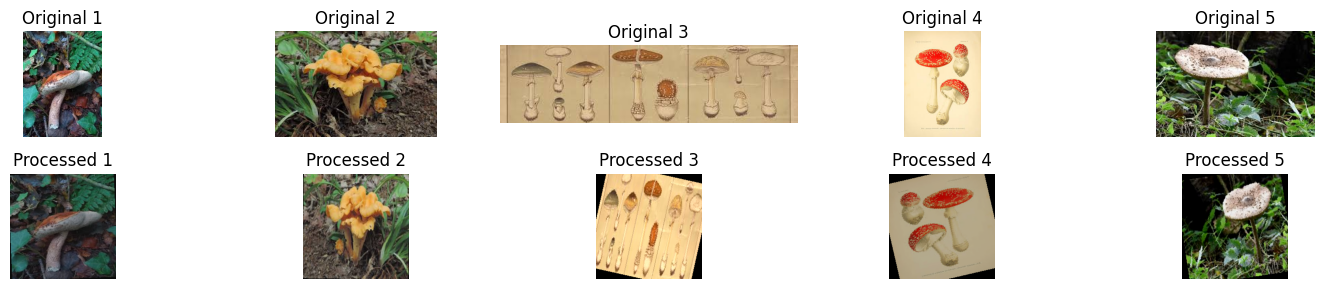

Showing group 2 (Images 6 to 10)


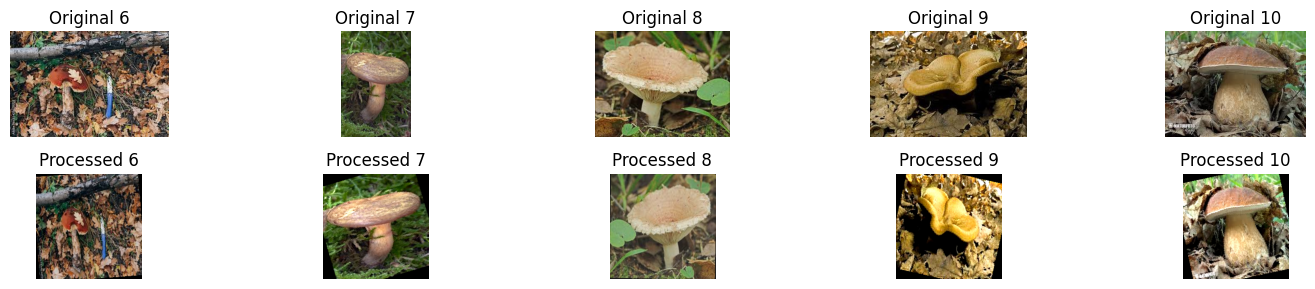

In [4]:
preperation.verify_preprocessing_sample(10, RAW_DIR, axis_on=False)

### Preprocess and save all

In [5]:
preperation.preprocess_and_save_as_tensors(RAW_DIR, PREPROCESSED_DIR)

Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00001.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00002.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00003.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00004.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00005.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00006.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00007.pt
Processed and saved: c:\Users\ilian\Documents\Projects\git_projects\u